# Contents 
1. Importing libraries and data and renaming columns 

2. The elbow technique

3. k-means clustering

4. Comments on the results

## Importing libraries and data

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import warnings
warnings.filterwarnings('ignore')

In [76]:
# This will ensure that the graphs I create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [77]:
path = r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_6\02_data\prepared_data'

In [78]:
df = pd.read_csv(os.path.join(path, 'agricultural_methane_emissions_years_final_new.csv'))

In [79]:
df.head(20)

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
0,1971,7819.39,948.33,2267.04,8003.67,13.55,71391.92,1017.12,71299.39,4790.85,...,643214.54,203167.89,16282.50,462081.02,462081.02,251448.90,251446.39,251448.90,1163422.42,2840961.47
1,1972,6672.29,930.32,2302.15,8901.30,13.47,74545.78,1047.96,78476.61,4760.50,...,654075.80,206064.10,16770.15,459594.90,459594.90,256212.48,256209.65,256212.48,1182836.11,2871562.42
2,1973,6960.20,960.89,2260.93,9776.05,13.23,77497.37,1067.61,71135.55,4810.32,...,654901.52,217738.87,17474.05,466486.88,466486.88,270082.52,270079.60,270082.52,1194238.39,2911944.73
3,1974,7378.03,985.79,2352.50,8063.48,12.83,77495.49,1099.75,75657.35,4945.58,...,674127.91,188037.33,17748.55,468547.08,468547.08,238223.69,238220.58,238223.69,1208394.15,2915398.22
4,1975,7836.13,1001.59,2512.39,10215.46,12.78,79162.96,1129.59,81516.08,4934.70,...,683966.76,210797.27,18043.21,477161.86,477161.86,261745.93,261742.64,261745.93,1229920.65,2979621.95
5,1976,7954.05,1062.28,2459.48,8601.50,12.80,81324.55,1130.86,86607.28,4891.35,...,683092.77,206048.57,17575.70,474672.77,474672.77,256464.56,256461.25,256464.56,1253881.16,2992540.36
6,1977,7781.35,1100.96,2696.95,10360.98,12.91,84699.39,1134.36,81711.86,4949.29,...,675178.55,232401.61,19022.06,484468.07,484468.07,286659.49,286656.40,286659.49,1248804.65,3022537.34
7,1978,7719.37,1168.09,2841.67,11075.28,15.49,80597.94,1156.88,72367.10,4994.43,...,664422.25,227305.46,18907.18,491679.26,491679.26,279801.49,279798.19,279801.49,1232434.36,3002825.73
8,1979,7541.71,1217.13,3133.01,15643.85,19.38,79536.52,1171.21,75951.25,5103.54,...,666747.41,266375.09,20035.06,492598.82,492598.82,322525.75,322522.27,322525.75,1229392.08,3039479.46
9,1980,7450.50,1257.07,3280.73,12320.03,22.06,78082.19,1179.23,77142.66,5075.16,...,675399.72,266210.45,19584.57,491552.94,491552.94,322252.14,322248.46,322252.14,1243881.18,3072596.43


In [80]:
# Renaming the unnamed column to year.
df.rename(columns = {'Unnamed: 0' : 'Year'}, inplace = True)

In [81]:
# Getting a list of all the column names
print(list(df.columns))

['Year', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, I

## The elbow technique

In [82]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [83]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-17325681460988.027,
 -5675526064194.541,
 -2081707711165.9849,
 -1517229316553.2458,
 -985300871643.8168,
 -688242889373.5,
 -556519917083.603,
 -467378946009.77747,
 -394525695156.82385]

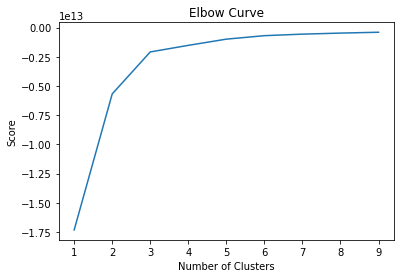

In [84]:
# Plotting the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is three.

## k-means clustering

In [85]:
# Creating the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [86]:
# Fitting the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3)

In [87]:
df['clusters'] = kmeans.fit_predict(df)

In [88]:
df.head(100)

,Year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World,clusters
0,1971,7819.39,948.33,2267.04,8003.67,13.55,71391.92,1017.12,71299.39,4790.85,...,203167.89,16282.50,462081.02,462081.02,251448.90,251446.39,251448.90,1163422.42,2840961.47,1
1,1972,6672.29,930.32,2302.15,8901.30,13.47,74545.78,1047.96,78476.61,4760.50,...,206064.10,16770.15,459594.90,459594.90,256212.48,256209.65,256212.48,1182836.11,2871562.42,1
2,1973,6960.20,960.89,2260.93,9776.05,13.23,77497.37,1067.61,71135.55,4810.32,...,217738.87,17474.05,466486.88,466486.88,270082.52,270079.60,270082.52,1194238.39,2911944.73,1
3,1974,7378.03,985.79,2352.50,8063.48,12.83,77495.49,1099.75,75657.35,4945.58,...,188037.33,17748.55,468547.08,468547.08,238223.69,238220.58,238223.69,1208394.15,2915398.22,1
4,1975,7836.13,1001.59,2512.39,10215.46,12.78,79162.96,1129.59,81516.08,4934.70,...,210797.27,18043.21,477161.86,477161.86,261745.93,261742.64,261745.93,1229920.65,2979621.95,1
5,1976,7954.05,1062.28,2459.48,8601.50,12.80,81324.55,1130.86,86607.28,4891.35,...,206048.57,17575.70,474672.77,474672.77,256464.56,256461.25,256464.56,1253881.16,2992540.36,1
6,1977,7781.35,1100.96,2696.95,10360.98,12.91,84699.39,1134.36,81711.86,4949.29,...,232401.61,19022.06,484468.07,484468.07,286659.49,286656.40,286659.49,1248804.65,3022537.34,1
7,1978,7719.37,1168.09,2841.67,11075.28,15.49,80597.94,1156.88,72367.10,4994.43,...,227305.46,18907.18,491679.26,491679.26,279801.49,279798.19,279801.49,1232434.36,3002825.73,1
8,1979,7541.71,1217.13,3133.01,15643.85,19.38,79536.52,1171.21,75951.25,5103.54,...,266375.09,20035.06,492598.82,492598.82,322525.75,322522.27,322525.75,1229392.08,3039479.46,1
9,1980,7450.50,1257.07,3280.73,12320.03,22.06,78082.19,1179.23,77142.66,5075.16,...,266210.45,19584.57,491552.94,491552.94,322252.14,322248.46,322252.14,1243881.18,3072596.43,1


In [89]:
df['clusters'].value_counts()

1    19
2    15
0    14
Name: clusters, dtype: int64

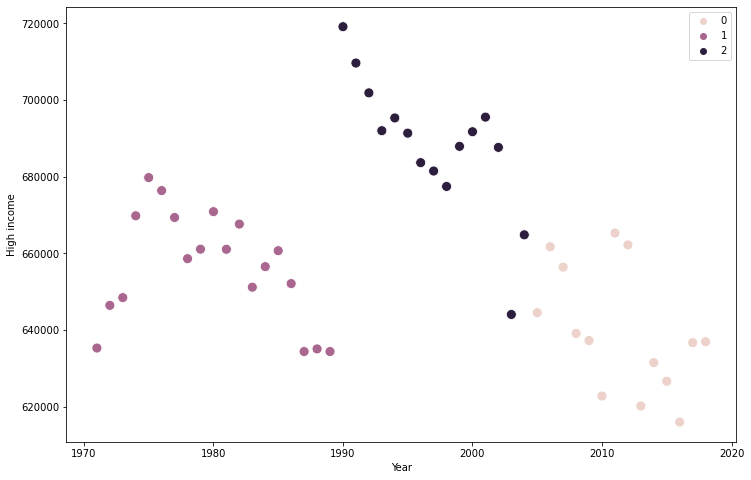

In [90]:
# Plotting the clusters for the "Year" and "High income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['High income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('High income') # Label y-axis.
plt.show()

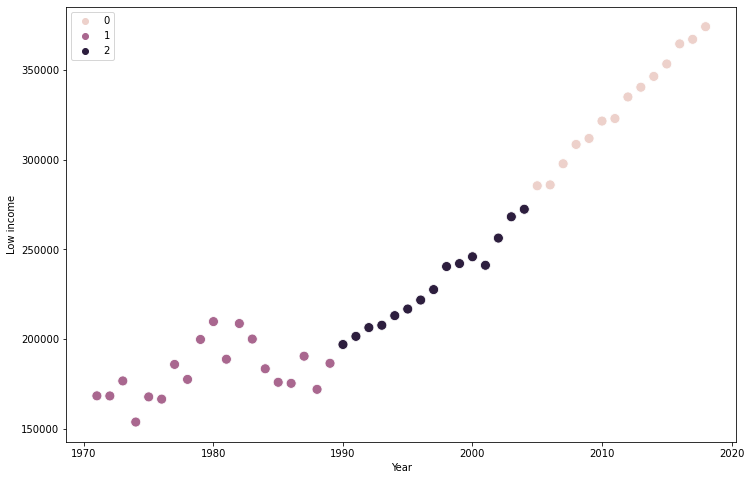

In [91]:
# Plotting the clusters for the "Year" and "Low income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Low income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Low income') # Label y-axis.
plt.show()

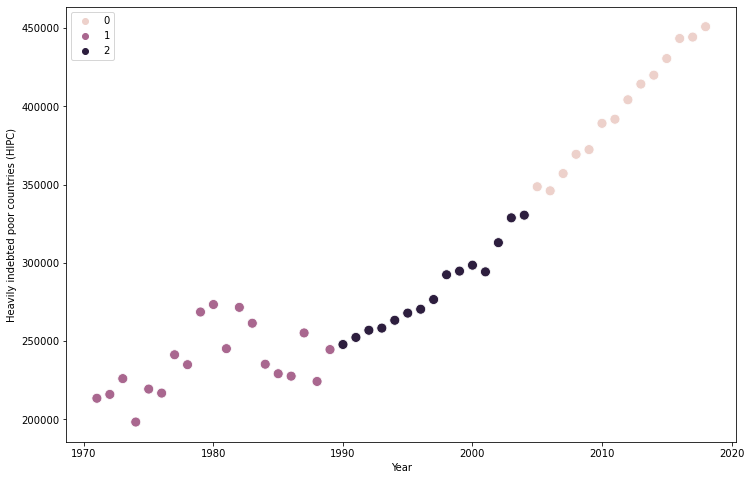

In [92]:
# Plotting the clusters for the "Year" and "Heavily indebted poor countries (HIPC)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Heavily indebted poor countries (HIPC)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Heavily indebted poor countries (HIPC)') # Label y-axis.
plt.show()

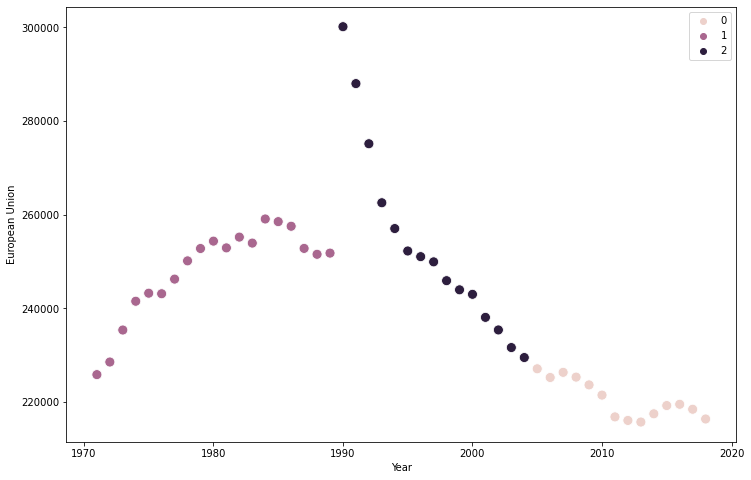

In [93]:
# Plotting the clusters for the "Year" and "European Union" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['European Union'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('European Union') # Label y-axis.
plt.show()

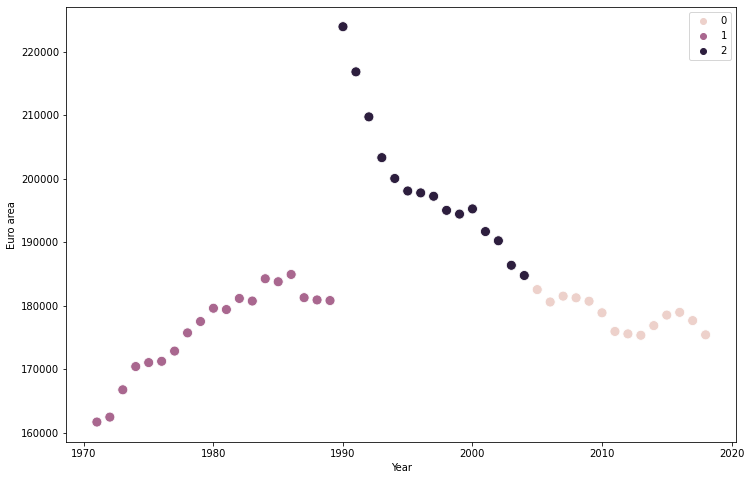

In [94]:
# Plotting the clusters for the "Year" and "Euro arean" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['Euro area'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Euro area') # Label y-axis.
plt.show()

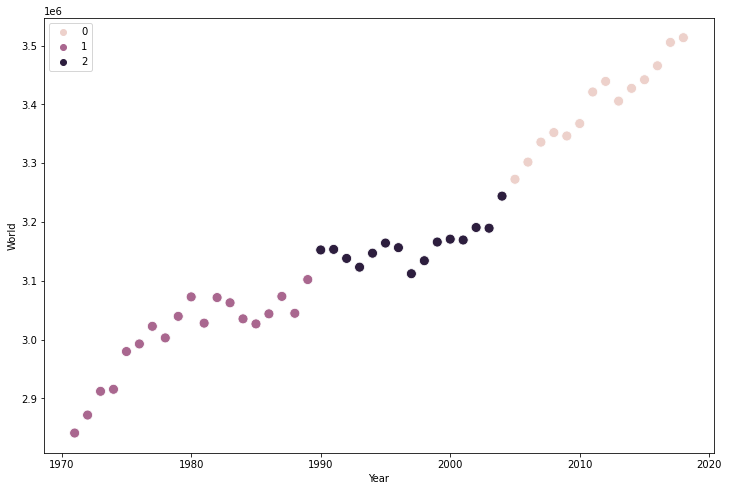

In [95]:
# Plotting the clusters for the "Year" and "World" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['World'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('World') # Label y-axis.
plt.show()

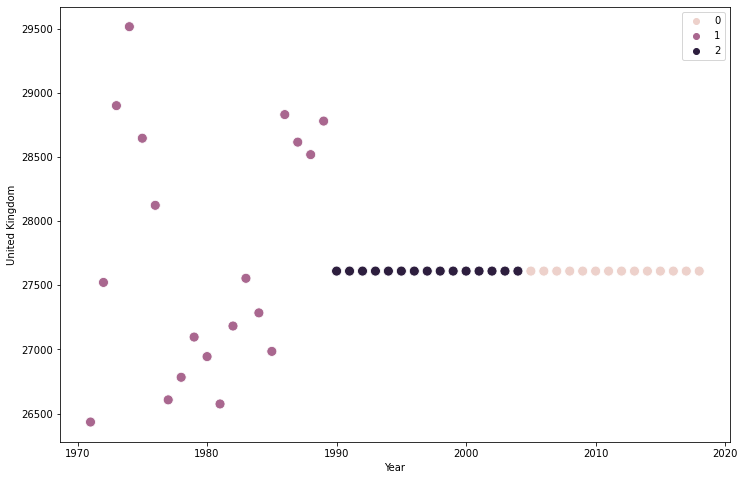

In [96]:
# Plotting the clusters for the "Year" and "United Kingdom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['United Kingdom'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('United Kingdom') # Label y-axis.
plt.show()

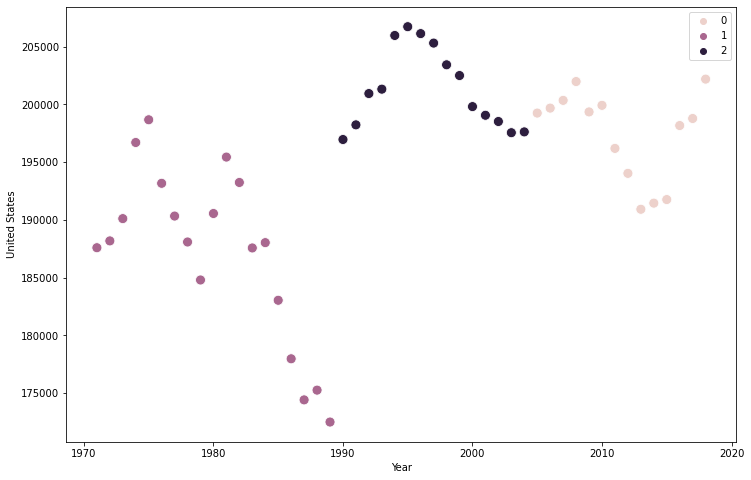

In [97]:
# Plotting the clusters for the "Year" and "United States" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['United States'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('United States') # Label y-axis.
plt.show()

In [98]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [99]:
df.groupby('cluster').agg({'High income':['mean', 'median'], 
                         'Low income':['mean', 'median'],
                          'Heavily indebted poor countries (HIPC)':['mean', 'median'],
                         'European Union':['mean', 'median'],
                           'Euro area':['mean', 'median'],
                          'United Kingdom':['mean', 'median'],
                          'World':['mean', 'median'],
                          'United States':['mean', 'median']})

High income                Low income             \
                      mean     median           mean     median   
cluster                                                           
dark purple  688248.000000  691360.00  230507.333333  227550.00   
pink         639849.285714  637150.00  329550.714286  328870.00   
purple       656300.905263  658641.43  181852.053684  177521.06   

            Heavily indebted poor countries (HIPC)           European Union  \
                                              mean    median           mean   
cluster                                                                       
dark purple                          283055.333333  276600.0  253590.666667   
pink                                 398628.571429  397920.0  220653.571429   
purple                               237010.408421  234985.6  248151.816316   

                            Euro area            United Kingdom            \
                median           mean     median           mean    median   
cluster                                                                     
dark purple  249950.00  198969.333333  197230.00   27610.000000  27610.00   
pink         219405.00  178547.142857  178700.00   27610.000000  27610.00   
purple       251816.59  176127.020526  179391.05   27730.785789  27521.65   

                    World              United States             
                     mean      median           mean     median  
cluster                                                          
dark purple  3.160723e+06  3156360.00  201338.666667  200940.00  
pink         3.399785e+06  3413425.00  197430.000000  199015.00  
purple       3.007220e+06  3027894.34  187139.473684  188086.19

## Comments on the results

According to the elbow technique, I was advised to divide my data into 3 clusters.
The population in the clusters seems to be more or less equal- there are not clusters with much larger concentraion of data points.
What my clusters gather is basically the air polution trends around close periods of time (years)- from early years towards the latest trends.

The cluster plotting the "Year" and "Low income" variables is for example showing an increasing polution trend. The same can be observed about the ''World''& ''Heavily indebted poor countries (HIPC)'' group.  The data there is very clearly clustered not only considering the time aspect but is showing clearly the polution levels- 1 being the lowest, 2 being the middle one and 0 being the highest. 

Another interesting discovery is the polution level in United Kingdom- we can see that the first cluster 1 is a bit spread between the years 1980 and 1990 and the polution levels are various without following a specific trend. Howeverm from there on- the data falls into 2 clusters with a constant trend. In this case here- I actually might find better to divide the data into 2 clusters combining 2 and 0 together. 

The pink and the purple clusters seem to have the best performance (lowest polution rates)- this might be caused by the many outliers in the dark purple area.
As mentioned, I find interesting again that the mean and median for United Kingdom of both dark purple and pink are equal- another reason I would combine them together.

Overwll, these results show different trends in the polution levels according to the region/ category of countries shown- increasing for some of the categories and decreasing for others (or remaining stable over the last years as with UK). I can use them further either to support or to reject my initial hypothesis that more rich countries will have higher polution levels caused by the higher level of meat consumption. 
